In [3]:
from IPython.display import YouTubeVideo

# MSE 8900 / CHE 8450 - Multiscale Modeling

Rachel B. Getman, Sapna Sarupria, Ulf D. Schiller

Clemson University

## Lecture 3.2: Langevin Dynamics

1. Langevin Dynamics
2. Langevin Thermostat
3. Diffusion / Brownian Motion

### References

1. M. P. Allen and D. J. Tildesley, Computer Simulation of Liquids, 2nd edition, Oxford University Press, Oxford, 2017  
(Chapters 2,8,12.2-3)
2. J. M. Haile, Molecular Dynamics Simulation: Elementary Methods, Wiley, New York 1992  
(Chapters 2,6,7)
3. D. Frenkel and B. Smit, Understanding Molecular Simulation: From Algorithms to Applications, 2nd edition, Academic Press, San Diego 2002  
(Chaters 2,4, Appendix C)
4. D. C. Rapaport, The Art of Molecular Dynamics Simulation, 2nd edition, Cambridge University Press, Cambridge 2004  
(Chapters 4,5)

### Brownian Motion

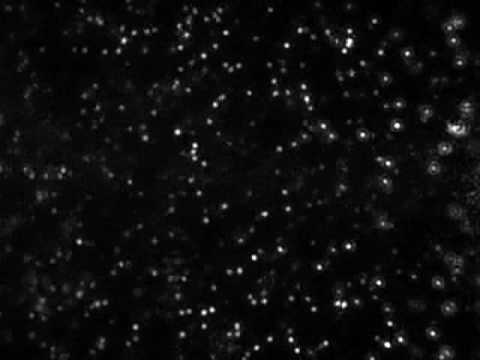

In [4]:
YouTubeVideo('cDcprgWiQEY')

###  Langevin Dynamics

Consider a single (tagged) particle which is immersed in a fluid. The particle experiences a force due to the collisions with other particles in the fluid. 

We know that, in equilibrium, the probability distribution of the velocity of the tagged particle is given by the Maxwell-Boltzmann distribution
$$f_1(v) = \frac{1}{V} \left(\frac{m}{2\pi k_BT}\right)^\frac{d}{2} \exp\left(-\frac{mv^2}{2k_BT} \right)$$

Rather than attempting to solve the BBGKY hierarchy, we now seek an equation of motion for the tagged particle. 

### Langevin Dynamics - Take 1

The random force on the particle can be modeled as a fluctuating stochastic force entering Newton's equation of motion.

$$m \dot{v} = \eta(t)$$

* Properties of the noise ($\delta$-correlated stationary noise $\rightarrow$ white noise)

$$\begin{aligned}
\overline{\eta(t)} &= \left\langle \eta(t) \right\rangle = 0 \\
\overline{\eta(t_1)\eta(t_2)} &= \left\langle \eta(t_1)\eta(t_2) \right\rangle = \Gamma \delta(t_1-t_2)
\end{aligned}$$

* Formal solution

$$ v(t) = v_0 + \frac{1}{m} \int_0^t \eta(t') \mathrm{d}t'$$

* Two averages: 1. over realizations of the noise and 2. over initial conditions (assumed to commute)

$$ \overline{v(t)} = v_0 \frac{1}{m} \int_0^t \overline{\eta(t')} \mathrm{d}t' = v_0$$
$$ \left\langle v(t) \right\rangle = \int_{-\infty}^{\infty} v_0 f_1(v_0) \mathrm{d}v_0=0$$

* Mean square velocity

$$\begin{aligned}
v^2(t) &= v_0^2 + \frac{2v_0}{m} \int_0^t \eta(t') \mathrm{d}t' + \frac{1}{m^2} \int_0^t \int_0^t \eta(t_1)\eta(t_2) \mathrm{d}t_1\mathrm{d}t_2 \\
\overline{v^2(t)}&=v_0^2 + \frac{\Gamma}{m^2} t \\
\left\langle v^2(t) \right\rangle &= \frac{k_B T}{m} + \frac{\Gamma}{m^2} t
\end{aligned}$$

* this is bad news... (does not converge to equilibrium!)

### Langevin Dynamics - Take 2


We need to introduce a drag term. The simplest model is a linear friction term.

$$m \dot{v} = - m \gamma v(t) + \eta(t)$$

* Formal solution (by variation of constants)

$$ v(t) = v_0 \exp(-\gamma t) + \frac{1}{m} \int_0^t \mathrm{d}t' \eta(t') \exp[-\gamma(t-t')] $$

* Average velocity

$$\begin{aligned}
\overline{v(t)} &= v_0 \exp(-\gamma t) \\
\left\langle v(t) \right\rangle &= 0
\end{aligned}$$

* Mean square velocity

$$\begin{aligned}
\overline{v^2(t)} &= v_0^2\exp(-2\gamma t) + \frac{\Gamma}{2m^2\gamma} \left[ 1 - \exp(-2\gamma t)\right] \\
\left\langle v^2(t) \right\rangle &= \left(\frac{k_B T}{m} - \frac{\Gamma}{2m^2\gamma}\right)\exp(-2\gamma t) + \frac{\Gamma}{2m^2\gamma}
\end{aligned}$$

* Consistency requires (fluctuation dissipation relation)

$$ \Gamma = 2m \gamma k_B T $$

### Langevin Thermostat

* The Langevin equation of motion can be used as a thermostat for MD simulations
* Can have a stabilizing effect!
* Add friction and noise to the conservative force
$$ F = -\nabla U - m \gamma v + \sqrt{2m\gamma k_BT} R(t) $$
* _Note:_ This force is velocity dependent (non-Hamiltonian)
* *Velocity-Verlet and equivalent algorithms "lose" an order of accuracy!*
* Can be mitigated by expanding the exact solution of the Ornstein-Uhlenbeck process for small time steps
* Leads to multiplicative factors in the discrete velocity update (see notes on Canvas)

### Correlations

* Velocity autocorrelation function (VACF)

$$\begin{aligned}
\overline{v(t)v(t')} &= v_0^2 \exp[-\gamma(t+t')] + \frac{k_B T}{m} \exp[-\gamma(t+t')] \left[\exp(2\gamma t') - 1 \right] \\
\left\langle v(t) v(t') \right\rangle &= \frac{k_BT}{m} \exp[-\gamma|t-t'|]
\end{aligned}$$

* VACF decays exponentially

* Continuous stationary Gaussian Markov-process with exponentially decaying correlations $\rightarrow$ _Ornstein-Uhlenbeck process_

* Ornstein-Uhlenbeck process: Brownian motion in a harmonic potential

### Mean Square Displacement (Microscale)

* Displacement of the Brownian particle

$$ \Delta x(t) = x(t) - x_0 = \int_0^t \mathrm{d}t' v(t') $$

* Mean square displacement

$$\begin{aligned}
\left\langle \left(\Delta x(t)\right)^2 \right\rangle &= \int_0^t \mathrm{d}t_1 \int_0^t \mathrm{d}t_2 \left\langle v(t_1)v(t_2) \right\rangle \\
&= \frac{k_BT}{m} \int_0^t \mathrm{d}t_1 \int_0^t \mathrm{d}t_2 \exp[-\gamma|t_1-t_2|] \\
&= \frac{2k_BT}{m} \int_0^t \mathrm{d}t_1 \int_0^{t_1} \mathrm{d}t_2 \exp[-\gamma(t_1-t_2)] \\
&= \frac{2k_BT}{m} \int_0^t \mathrm{d}s (t-s) \exp(-\gamma s) \\
&= \frac{2k_BT}{m\gamma} \int_0^t \mathrm{d}t_1 \left( 1 - \exp(-\gamma t_1) \right) \\
&= \frac{2k_BT}{m\gamma^2} \left[ \gamma t + \exp(-\gamma t) - 1 \right]
\end{aligned}$$

* Asymptotic behavior

$$\begin{aligned}
\gamma t \rightarrow 0 &\Rightarrow \left\langle \left(\Delta x(t)\right)^2 \right\rangle \rightarrow \frac{k_B T}{m} t^2 = \langle v^2 \rangle_\text{eq} t^2\\
\gamma t \rightarrow \infty &\Rightarrow \left\langle \left(\Delta x(t)\right)^2 \right\rangle \rightarrow \frac{2k_BT}{m\gamma} t
\end{aligned}$$

* at small times: ballistic behavior
* at large times: diffusive behavior

### Alternative Derivation of Mean Square Displacement (for Langevin Dynamics)

* Langevin Equation

$$ \dot{v} = -\gamma v + \frac{\eta}{m} $$

* Can be written in averaged form

$$ \langle x\dot{v} \rangle + \gamma \langle x v \rangle = 0 $$

* Differential equation for mean square displacement

$$ \frac{d^2}{dt^2} \langle x^2 \rangle + \gamma \frac{d}{dt}\langle x^2 \rangle = 2 \langle v^2 \rangle = \frac{k_B T}{m}$$

* Solution

$$ \langle x^2 \rangle = \frac{2k_BT}{m\gamma^2} \left[ \exp(-\gamma t) - 1 + \gamma t \right] $$

* Diffusive regime (Einstein relation)

$$ \lim_{t\rightarrow\infty} \langle x^2 \rangle = \frac{2k_BT}{m\gamma} t $$

$$ \lim_{t\rightarrow\infty} \frac{d}{dt} \langle x^2 \rangle = \frac{2k_BT}{m\gamma} $$

### Diffusion Coefficient (Macroscale)

* Diffusion equation

$$ \frac{\partial c}{\partial t} = D \nabla^2 c(\vec{r},t) $$

* Mean square displacement

$$ \langle r^2(t) \rangle = \int \mathrm{d}\vec{r} c(\vec{r},t) r^2 $$

* Time evolution

$$\begin{aligned}
\frac{\partial \langle r^2 \rangle}{\partial t} &= D \int \mathrm{d}\vec{r} r^2 \nabla^2 c(\vec{r},t) \\
&= D \int \mathrm{d}\vec{r} \nabla\cdot\left(r^2\nabla c(\vec{r},t)\right) - D \int\mathrm{d}\vec{r} \nabla r^2 \cdot\nabla c(\vec{r},t) \\
&= - 2 D \int \mathrm{d}\vec{r} \vec{r}\cdot\nabla c(\vec{r},t) \\
&= - 2 D \int \mathrm{d}\vec{r} \nabla\cdot(\vec{r}c(\vec{r},t)) + 2 D \int\mathrm{d}\vec{r} (\nabla\cdot\vec{r}) c(\vec{r},t) \\
&= 2 d D \int \mathrm{d}\vec{r} c(\vec{r},t) \\
&= 2 d D
\end{aligned}$$

* One-dimensional

$$\frac{\partial \langle x^2 \rangle}{\partial t} = 2D $$

$$\langle x^2 \rangle = 2D t$$

### Comparison of Microscale and Macroscale

* Diffusion coefficient

$$ D = \frac{k_BT}{m\gamma} $$

* Green-Kubo relation (expresses _macroscopic_ dynamic property as a time integral of _microscopic_ correlation function)

$$\begin{aligned}
D = \int_0^\infty \mathrm{dt} \left\langle v(t) v(0) \right\rangle
\end{aligned}$$

* Einstein relation

$$D = \lim_{t\rightarrow\infty} \frac{\langle x^2 \rangle}{2t} = \lim_{t\rightarrow\infty} \frac{1}{2}\frac{d}{dt} \langle x^2 \rangle$$

* Stokes-Einstein relation

$$ D = \frac{k_BT}{m\gamma} = \frac{k_BT}{6\pi a \eta}$$

### Linear Response Theory and Fluctuation Dissipation Relations

* Consider a colloidal particle subject to an external force $F$

$$ \mathcal{H} = \mathcal{H}_0 - F x $$

* Static Response

$$ \langle x \rangle = \beta  F \langle x^2 \rangle_\text{eq}$$

* Dynamic Response (_after-effect function_)

$$ \chi_{v,x}(t) = 
\begin{cases}
-\beta \left\langle \dot{v}(t) x(0) \right\rangle = \beta \left\langle v(t) v(0) \right\rangle & t>0\\
0 & t \le 0
\end{cases}$$

* Velocity of the particle

$$\begin{aligned}
\langle v(t) \rangle %&= F \int_{-\infty}^t dt' \chi_{v,x}(t-t') \\
&=  F \int_0^\infty \mathrm{d}s \, \chi_{v,x}(s)
%&= -\frac{F}{k_BT} \int_0^\infty \mathrm{d}s \left\langle \dot{v}(s) x(0) \right\rangle \\
= \frac{F}{k_BT} \int_0^\infty \mathrm{d}s \left\langle v(s) v(0) \right\rangle
\end{aligned}$$

* Mobility

$$ \mu = \frac{\langle v \rangle}{F} = \frac{D}{k_B T} $$

* Important application of linear response theory: Derivation of expressions for transport coefficients of hydrodynamics

### Brownian Motion

* Overdamped limit of Langevin Dynamics

$$ \dot{\vec{r}}_i = \sum_j \frac{D_{ij}}{k_B T} F_j + \Delta\vec{r}_i $$

* Fluctuation dissipation relations

$$\begin{aligned}
\left\langle \Delta\vec{r}_i \right\rangle &= 0 , \\
\left\langle \Delta\vec{r}_i(t) \Delta\vec{r}_j(t') \right\rangle &= 2 \mathsf{D}_{ij} \delta(t-t') .
\end{aligned}$$

* Oseen tensor

$${D}_{ij}(\vec{r}) = \frac{k_B T}{8 \pi \eta \, {r}} \left( \mathsf{I} + \frac{\vec{r} \otimes \vec{r}}{r^2} \right)$$

<!--
* Rotne-Prager tensor

$$\begin{aligned}\label{eq:rotne-prager}
{D}_{ij} &= D_0\; \Bigg\{\left(1-\frac{9\,r_{ij}}{32\,a}\right) \mathbf{I} + \frac{3}{32} \frac{\mathbf{r}_{ij} \otimes \mathbf{r}_{ij}}{a\,r_{ij}}\Bigg\}, &\quad r_{ij} < 2a\nonumber\\
{D}_{ij} &=\nonumber
D_0\; \frac{3\,a}{4\,r_{ij}}\;\Bigg\{\mathbf{I} + \frac{\mathbf{r}_{ij} \otimes \mathbf{r}_{ij}}{r^2_{ij}} \\ &\qquad\qquad\qquad+ \frac{2\,a^2}{3\,r^2_{ij}} \left(\mathbf{I} - 3 \frac{\mathbf{r}_{ij} \otimes \mathbf{r}_{ij}}{r^2_{ij}}\right)\Bigg\}, &\quad r_{ij}\ge 2a\nonumber\\
{D}_{ii} &= D_0\; \mathbf{I}
\end{aligned}$$
-->

* Time-integration with $\mathsf{D}_{ij} = \mathsf{B}_{ik}\cdot\mathsf{B}^T_{jk}$

$$\vec{r}_i(t+h) = \vec{r}_i(t) + \frac{\mathsf{D}_{ij}}{k_BT} h \vec{F}_j + \sqrt{2 h} \, \mathsf{B}_{ij} \cdot \vec{W}_j $$

* Wiener process $\left\langle \vec{W}_i \right\rangle = 0$ and $\left\langle \vec{W}_i \otimes \vec{W}_j \right\rangle = \mathbf{I} \delta_{ij}$. 

* Cholesky decomposition $O(N^3)$

$$\mathsf{D}_{ij}=\mathsf{C}_{ik}\cdot\mathsf{C}^T_{jk}$$ 

* Chebyshev polynomial approximation $O(N^{2.25})$

* Ewald-like methods using fast Fourier transformations $O(n^{1+x}\log N)$

### Hands-On Activity

1. Implement a Langevin thermostat in your MD code and investigate its behavior by analyzing how the energy/temperature depend on the time step.
2. Use Langevin dynamics to simulate Brownian motion of a single colloidal particle. Compare the results for the mean square displacement and the velocity autocorrelation function to the results you obtained before for the Lennard-Jones system.
3. Apply an external force to the Brownian particle and measure its terminal velocity. Validate if your result satisfies the fluctuation dissipation relation.

### References

1. M. P. Allen and D. J. Tildesley, Computer Simulation of Liquids, 2nd edition, Oxford University Press, Oxford, 2017
2. J. M. Haile, Molecular Dynamics Simulation: Elementary Methods, Wiley, New York 1992
3. D. Frenkel and B. Smit, Understanding Molecular Simulation: From Algorithms to Applications, 2nd edition, Academic Press, San Diego 2002
4. D. C. Rapaport, The Art of Molecular Dynamics Simulation, 2nd edition, Cambridge University Press, Cambridge 2004
5. B. J. Alder and T. E. Wainwright, Velocity Autocorrelations for Hard Spheres. Phys. Rev. Lett. 18, 988–990 (1967).